Ana Valeria Guzman Vazquez
A01643224

Importe las librerias requeridas para poder correr el codigo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


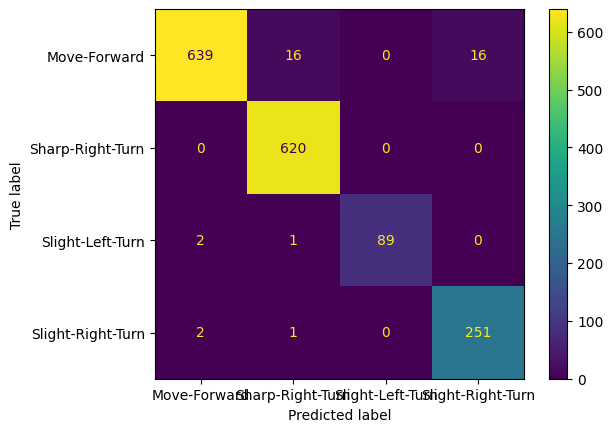

                   precision    recall  f1-score   support

     Move-Forward       0.99      0.95      0.97       671
 Sharp-Right-Turn       0.97      1.00      0.99       620
 Slight-Left-Turn       1.00      0.97      0.98        92
Slight-Right-Turn       0.94      0.99      0.96       254

         accuracy                           0.98      1637
        macro avg       0.98      0.98      0.98      1637
     weighted avg       0.98      0.98      0.98      1637



In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/sensor_readings_4.data'  # Ajustar ruta exacta

#  Cargar los datos del robot
data = pd.read_csv(file_path, header=None)

# Preprocesamiento
# Codificar las etiquetas de texto a números
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Estandarizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Extraccion de los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Configuración del modelo  y entrenamiento
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Prediccion de variable
y_pred = mlp.predict(X_test)

# Matriz de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=mlp.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))

En este caso la distribucion de las clases son de la siguiente forma:
-moverse hacia adelante fueron 639 instancias
-sharp right turn fueron 16 instancias
-slight left turn fueron 16 instancias
-slight right turn fueron 620 instancias
se puede observar que hacia adelante y slight turn fueron las que mas instancias tuvieron.

En total se pudo observar una exactitud de 98% con un total de muestras 1637.

Asi mismo en el aspecto slight left turn dio una presicion del 100% y en el move foward dio el 99%, mientras que en sharp right y slight right dieron 97 y 94 porciento respectivamente.
En conclusion se puede observar que hubo una presicion de los valores de un alto porcentaje el cual demuestra que los valores dieron en su mayoria correctamente.